<a href="https://colab.research.google.com/github/kashifalikhan36/Olivetti_Face_Recognition/blob/main/Olivetti_Face_recognition_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

In [2]:
olivate_data=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
features=olivate_data.data
targets=olivate_data.target

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

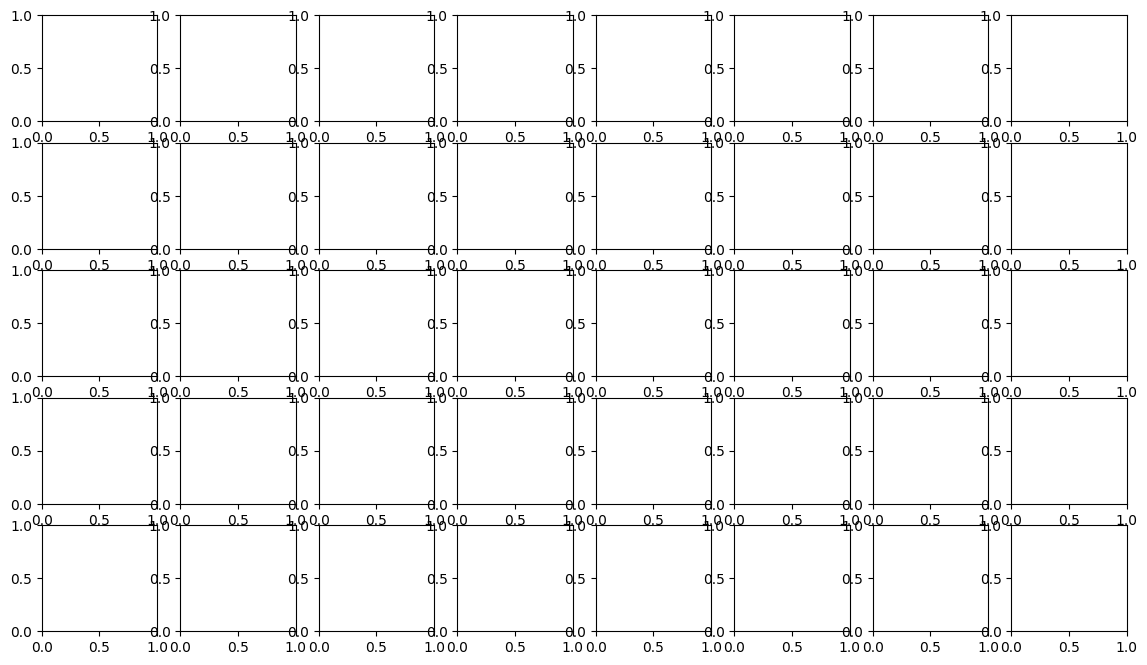

In [4]:
fig, sub_plots = plt.subplots(nrows=5,ncols=8,figsize=(14,8))
sub_plots.flatten()

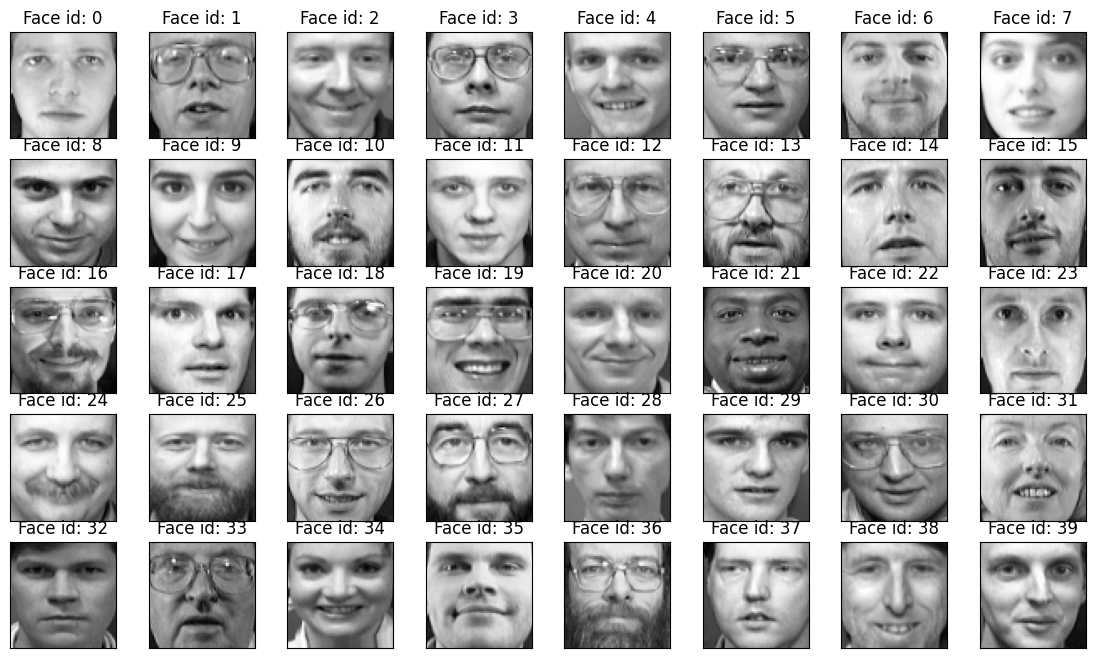

In [8]:
fig, sub_plot = plt.subplots(nrows=5, ncols=8, figsize=(14,8))
sub_plot = sub_plot.flatten()
for unique_user_id in np.unique(targets):
  img_index=unique_user_id*10
  sub_plot[unique_user_id].imshow(features[img_index].reshape(64,64), cmap='gray')
  sub_plot[unique_user_id].set_xticks([])
  sub_plot[unique_user_id].set_yticks([])
  sub_plot[unique_user_id].set_title("Face id: %s"% unique_user_id)

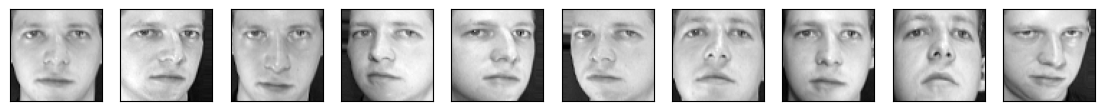

In [9]:
fig, sub_plots=plt.subplots(nrows=1,ncols=10,figsize=(14,8))
sub_plots=sub_plots.flatten()
for j in range(10):
  sub_plots[j].imshow(features[j].reshape(64,64), cmap='gray')
  sub_plots[j].set_xticks([])
  sub_plots[j].set_yticks([])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.25)

In [11]:
pca=PCA(n_components=100)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [13]:
no_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape(no_of_eigenfaces,64,64)

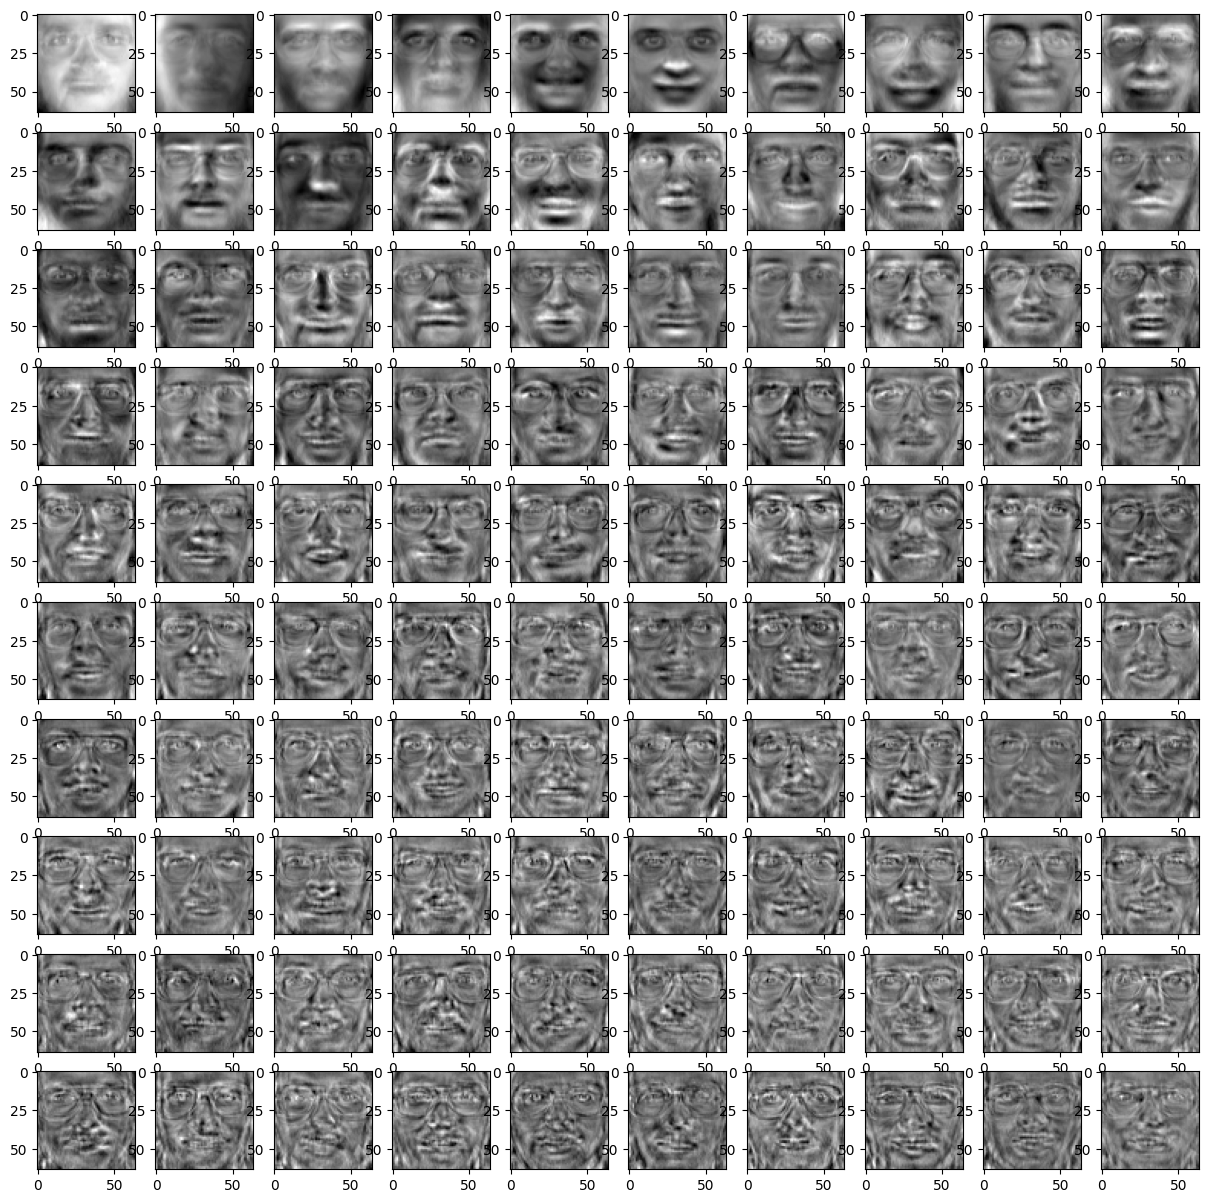

In [14]:
fig,sub_plots=plt.subplots(nrows=10,ncols=10,figsize=(15,15))
sub_plots=sub_plots.flatten()
for i in range(100):
  sub_plots[i].imshow(eigen_faces[i],cmap='gray')

In [16]:
models=[("logistic",LogisticRegression()),("Support Vector Machine",SVC()),("Naive Bayes",GaussianNB())]

In [23]:
for name, model in models:
  classifier_model=model
  classifier_model.fit(X_train_pca,y_train)
  y_pred=classifier_model.predict(X_test_pca)
  print(name,"\n")
  print(metrics.accuracy_score(y_test,y_pred))

logistic 

1.0
Support Vector Machine 

0.94
Naive Bayes 

0.92


In [27]:
for name, model in models:
  kfold=KFold(n_splits=5,shuffle=True,random_state=0)
  cv_results=cross_val_score(model,X_train_pca,y_train,cv=kfold)
  print(name,"\n")
  print(cv_results.mean())

logistic 

0.9433333333333334
Support Vector Machine 

0.82
Naive Bayes 

0.5733333333333334
